In [61]:
from census import Census
from us import states
from config import API_KEY
import contextily
import matplotlib.pyplot as plt

In [45]:
c = Census(API_KEY, year = 2019)
c.acs1.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

[{'NAME': 'Maryland', 'B25034_010E': 129318.0, 'state': '24'}]

In [46]:
import cenpy
import segregation
import contextily

ImportError: cannot import name '_dep_message' from 'segregation.util.util' (/Users/kathrynpanger/opt/anaconda3/envs/parsonsVenv/lib/python3.10/site-packages/segregation/util/util.py)

In [ ]:
acs = cenpy.products.ACS()



In [ ]:
print(acs.variables)

                                                   label  \
AIANHH                                         Geography   
AIHHTL                                         Geography   
AIRES                                          Geography   
ANRC                                           Geography   
B01001A_001E                            Estimate!!Total:   
...                                                  ...   
UA                                             Geography   
ZCTA                                           Geography   
for                         Census API FIPS 'for' clause   
in                           Census API FIPS 'in' clause   
ucgid         Uniform Census Geography Identifier clause   

                                         concept predicateType    group limit  \
AIANHH                                       NaN           NaN      N/A     0   
AIHHTL                                       NaN           NaN      N/A     0   
AIRES                               

In [47]:
print(acs.tables)

                                                  description  \
table_name                                                      
B01001                                             SEX BY AGE   
B01002                                      MEDIAN AGE BY SEX   
B01003                                       TOTAL POPULATION   
B02001                                                   RACE   
B02008      WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...   
...                                                       ...   
C27014             PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE   
C27016      HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...   
C27017      PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...   
C27018      PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...   
C27021      HEALTH INSURANCE COVERAGE STATUS  BY LIVING AR...   

                                                      columns  
table_name                                                     
B01001      [B01001_001E, 

In [48]:
acs.filter_tables('COST', by='description')



,description,columns
table_name,,
B25087,MORTGAGE STATUS AND SELECTED MONTHLY OWNER COSTS,"[B25087_001E, B25087_002E, B25087_003E, B25087..."
B25088,MEDIAN SELECTED MONTHLY OWNER COSTS (DOLLARS) ...,"[B25088_001E, B25088_002E, B25088_003E]"
B25089,AGGREGATE SELECTED MONTHLY OWNER COSTS (DOLLAR...,"[B25089_001E, B25089_002E, B25089_003E]"
B25091,MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...,"[B25091_001E, B25091_002E, B25091_003E, B25091..."
B25092,MEDIAN SELECTED MONTHLY OWNER COSTS AS A PERCE...,"[B25092_001E, B25092_002E, B25092_003E]"
B25093,AGE OF HOUSEHOLDER BY SELECTED MONTHLY OWNER C...,"[B25093_001E, B25093_002E, B25093_003E, B25093..."
B25094,SELECTED MONTHLY OWNER COSTS,"[B25094_001E, B25094_002E, B25094_003E, B25094..."
B25095,HOUSEHOLD INCOME BY SELECTED MONTHLY OWNER COS...,"[B25095_001E, B25095_002E, B25095_003E, B25095..."
B25101,MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A ...,"[B25101_001E, B25101_002E, B25101_003E, B25101..."


In [63]:
variables = ['B25105_001E']

In [64]:
chicago = acs.from_place('Chicago, IL', variables=variables)



Matched: Chicago, IL to Chicago city within layer Incorporated Places


/var/folders/lw/jy_c2z0x221fsb78kk1_h2800000gn/T/ipykernel_78394/1799203092.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  chicago = acs.from_place('Chicago, IL', variables=variables)


In [65]:
chicago_basemap, chicago_extent = contextily.bounds2img(*chicago.total_bounds, zoom=10, 
                                                        )


In [66]:
print(chicago)

           GEOID                                           geometry  \
0    17031171100  POLYGON ((-9772331.340 5152816.560, -9772331.3...   
1    17031191301  POLYGON ((-9772230.810 5149553.630, -9772203.6...   
2    17031191302  POLYGON ((-9771148.010 5149575.920, -9771120.8...   
3    17031190701  POLYGON ((-9770093.810 5150690.620, -9770066.4...   
4    17031252102  POLYGON ((-9769939.970 5143057.720, -9769902.5...   
..           ...                                                ...   
659  17031838800  POLYGON ((-9751804.910 5113782.550, -9751802.9...   
660  17031460700  POLYGON ((-9746643.140 5121713.450, -9746631.8...   
661  17031460200  POLYGON ((-9746328.770 5122804.180, -9746314.4...   
662  17031461000  POLYGON ((-9746645.140 5120615.840, -9746628.5...   
663  17031833900  POLYGON ((-9747143.300 5121114.360, -9747107.3...   

     B25105_001E state county   tract  
0         1447.0    17    031  171100  
1         1283.0    17    031  191301  
2         1186.0    17    0

<Axes: >

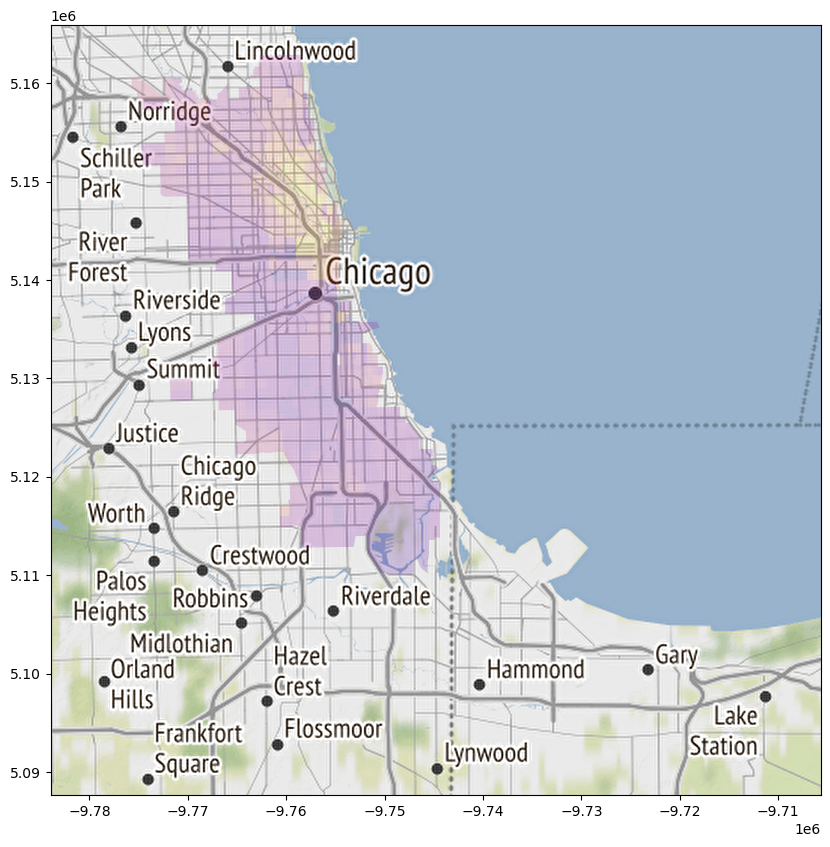

In [67]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(chicago_basemap, extent=chicago_extent, interpolation='sinc')
chicago['housing_cost'] = chicago.eval('B25105_001E')
chicago.plot('housing_cost', cmap='plasma', ax = ax, alpha=.2)

